In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
file_path = '../data/Dados-Processo-tratados/todos_ensaios.csv'

df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
df.groupby('ensaio').max()

,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity,sensor_PT100_2
ensaio,,,,,,,,,,
1,4800.5,40.91,36.32,34.62,53.12,26.06,70.51,32.08,12.74,NaN
2,3420.0,34.69,33.93,31.42,78.07,21.28,84.45,28.69,17.72,-47.91
3,4800.0,41.10,54.40,55.13,36.45,33.41,61.56,50.34,12.80,23.50
4,3480.0,37.32,35.46,35.55,60.89,28.84,79.66,33.73,14.92,17.78
5,4020.0,38.17,30.77,30.44,57.08,28.32,79.46,29.35,13.90,16.01
6,4015.5,42.97,48.26,49.02,55.43,28.32,73.54,41.96,10.64,20.62
7,5220.3,39.25,52.47,46.67,52.24,30.79,64.64,40.06,11.10,20.11
8,3240.2,41.91,31.73,31.70,72.05,21.64,82.49,30.18,23.83,12.46
9,4020.0,36.26,33.56,33.53,61.30,25.75,75.19,31.57,12.67,3.09


# Getting the data ready

#### Defining variables to be used in models

In [3]:
y_name = 'product_humidity'
X_names = list(df.columns)
X_names.pop(X_names.index(y_name)) # removing dependent variable from independent list

# Without sensor pt100 2 column
df_1 = df.drop(columns=['sensor_PT100_2', 'ensaio']).reset_index(drop=True)

# Without lines from ensaio 1
df_2 = df.loc[df['ensaio'] != 1].drop(columns=['ensaio']).reset_index(drop=True)

display(df_1)
display(df_2)

,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity
0,600.6,39.68,31.51,29.41,53.12,25.65,62.89,28.63,9.06
1,1200.6,40.24,31.91,29.92,52.55,25.80,67.16,28.84,11.91
2,1800.6,40.50,32.37,30.42,50.50,25.80,69.79,29.56,12.74
3,2400.6,40.67,33.11,31.22,50.34,25.85,70.51,29.56,12.33
4,3000.6,40.72,33.84,31.96,49.16,25.96,67.88,30.18,9.00
...,...,...,...,...,...,...,...,...,...
74,1800.0,39.55,32.23,32.24,69.48,24.88,70.10,30.28,12.38
75,2400.0,39.36,32.53,32.67,67.37,25.08,74.16,31.46,11.87
76,3000.0,39.44,33.20,33.39,66.75,25.49,76.32,32.18,10.78
77,3600.0,39.43,34.63,34.61,65.93,26.06,75.03,32.96,10.17


,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity,sensor_PT100_2
0,605.0,34.69,32.80,30.75,76.47,21.28,72.72,26.32,10.92,-49.97
1,1200.0,34.56,33.85,31.29,77.14,21.07,80.64,27.61,14.17,-49.30
2,1800.0,34.61,33.82,31.42,77.30,21.02,83.26,28.27,15.53,-48.68
3,2400.0,34.51,33.93,31.41,77.86,20.92,83.78,28.69,17.72,-48.39
4,3000.0,34.60,33.79,31.31,78.07,21.07,84.14,28.58,13.55,-48.01
...,...,...,...,...,...,...,...,...,...,...
66,1800.0,39.55,32.23,32.24,69.48,24.88,70.10,30.28,12.38,17.52
67,2400.0,39.36,32.53,32.67,67.37,25.08,74.16,31.46,11.87,17.20
68,3000.0,39.44,33.20,33.39,66.75,25.49,76.32,32.18,10.78,17.26
69,3600.0,39.43,34.63,34.61,65.93,26.06,75.03,32.96,10.17,17.23


#### Normalizing the data

In [4]:
from sklearn.preprocessing import StandardScaler

# # Normalizing without column
df_1_x_columns = list(df_1.columns)
df_1_x_columns.pop(df_1_x_columns.index(y_name))

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_1[df_1_x_columns])
df_normalized = pd.DataFrame(normalized_data, columns=df_1_x_columns)

df_1_normalized = pd.DataFrame(df_1)
df_1_normalized[df_1_x_columns] = df_normalized
display(df_1_normalized)

# Normalizing without e1 lines
df_2_x_columns = list(df_2.columns)
df_2_x_columns.pop(df_2_x_columns.index(y_name))

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_2[df_2_x_columns])
df_normalized = pd.DataFrame(normalized_data, columns=df_2_x_columns)

df_2_normalized = pd.DataFrame(df_2)
df_2_normalized[df_2_x_columns] = df_normalized
display(df_2_normalized)

,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity
0,-1.633073,0.378006,-0.753205,-0.950742,-0.073569,-0.411760,-0.175875,-0.858938,9.06
1,-1.132498,0.633514,-0.695840,-0.871007,-0.121372,-0.360495,0.109726,-0.817458,11.91
2,-0.631923,0.752142,-0.629870,-0.792836,-0.293298,-0.360495,0.285634,-0.675239,12.74
3,-0.131348,0.829707,-0.523745,-0.667762,-0.306717,-0.343407,0.333792,-0.675239,12.33
4,0.369227,0.852520,-0.419054,-0.552068,-0.405679,-0.305813,0.157883,-0.552773,9.00
...,...,...,...,...,...,...,...,...,...
74,-0.632424,0.318692,-0.649948,-0.508292,1.298482,-0.674917,0.306369,-0.533020,12.38
75,-0.131849,0.232002,-0.606924,-0.441065,1.121524,-0.606564,0.577923,-0.299940,11.87
76,0.368726,0.268503,-0.510838,-0.328498,1.069527,-0.466442,0.722395,-0.157721,10.78
77,0.869301,0.263940,-0.305758,-0.137760,1.000757,-0.271637,0.636113,-0.003650,10.17


,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity,sensor_PT100_2
0,-1.647032,-1.781324,-0.594383,-0.783427,1.764704,-1.852509,0.458340,-1.334653,10.92,-2.441895
1,-1.141096,-1.839644,-0.449604,-0.701485,1.818334,-1.920969,0.962101,-1.087991,14.17,-2.411608
2,-0.630908,-1.817214,-0.453740,-0.681759,1.831141,-1.937269,1.128749,-0.961792,15.53,-2.383582
3,-0.120720,-1.862075,-0.438573,-0.683276,1.875966,-1.969869,1.161824,-0.881483,17.72,-2.370473
4,0.389467,-1.821700,-0.457877,-0.698450,1.892775,-1.920969,1.184722,-0.902516,13.55,-2.353295
...,...,...,...,...,...,...,...,...,...,...
66,-0.630908,0.398953,-0.672978,-0.557328,1.205191,-0.678907,0.291692,-0.577457,12.38,0.608916
67,-0.120720,0.313716,-0.631612,-0.492078,1.036297,-0.613707,0.549933,-0.351828,11.87,0.594450
68,0.389467,0.349605,-0.539229,-0.382823,0.986669,-0.480047,0.687322,-0.214156,10.78,0.597163
69,0.899655,0.345119,-0.342053,-0.197695,0.921033,-0.294227,0.605270,-0.065012,10.17,0.595806


In [5]:
df_1_X = df_1_normalized[df_1_x_columns]
df_1_y = df_1_normalized[y_name]

df_2_X = df_2_normalized[df_2_x_columns]
df_2_y = df_2_normalized[y_name]

# Variables relations

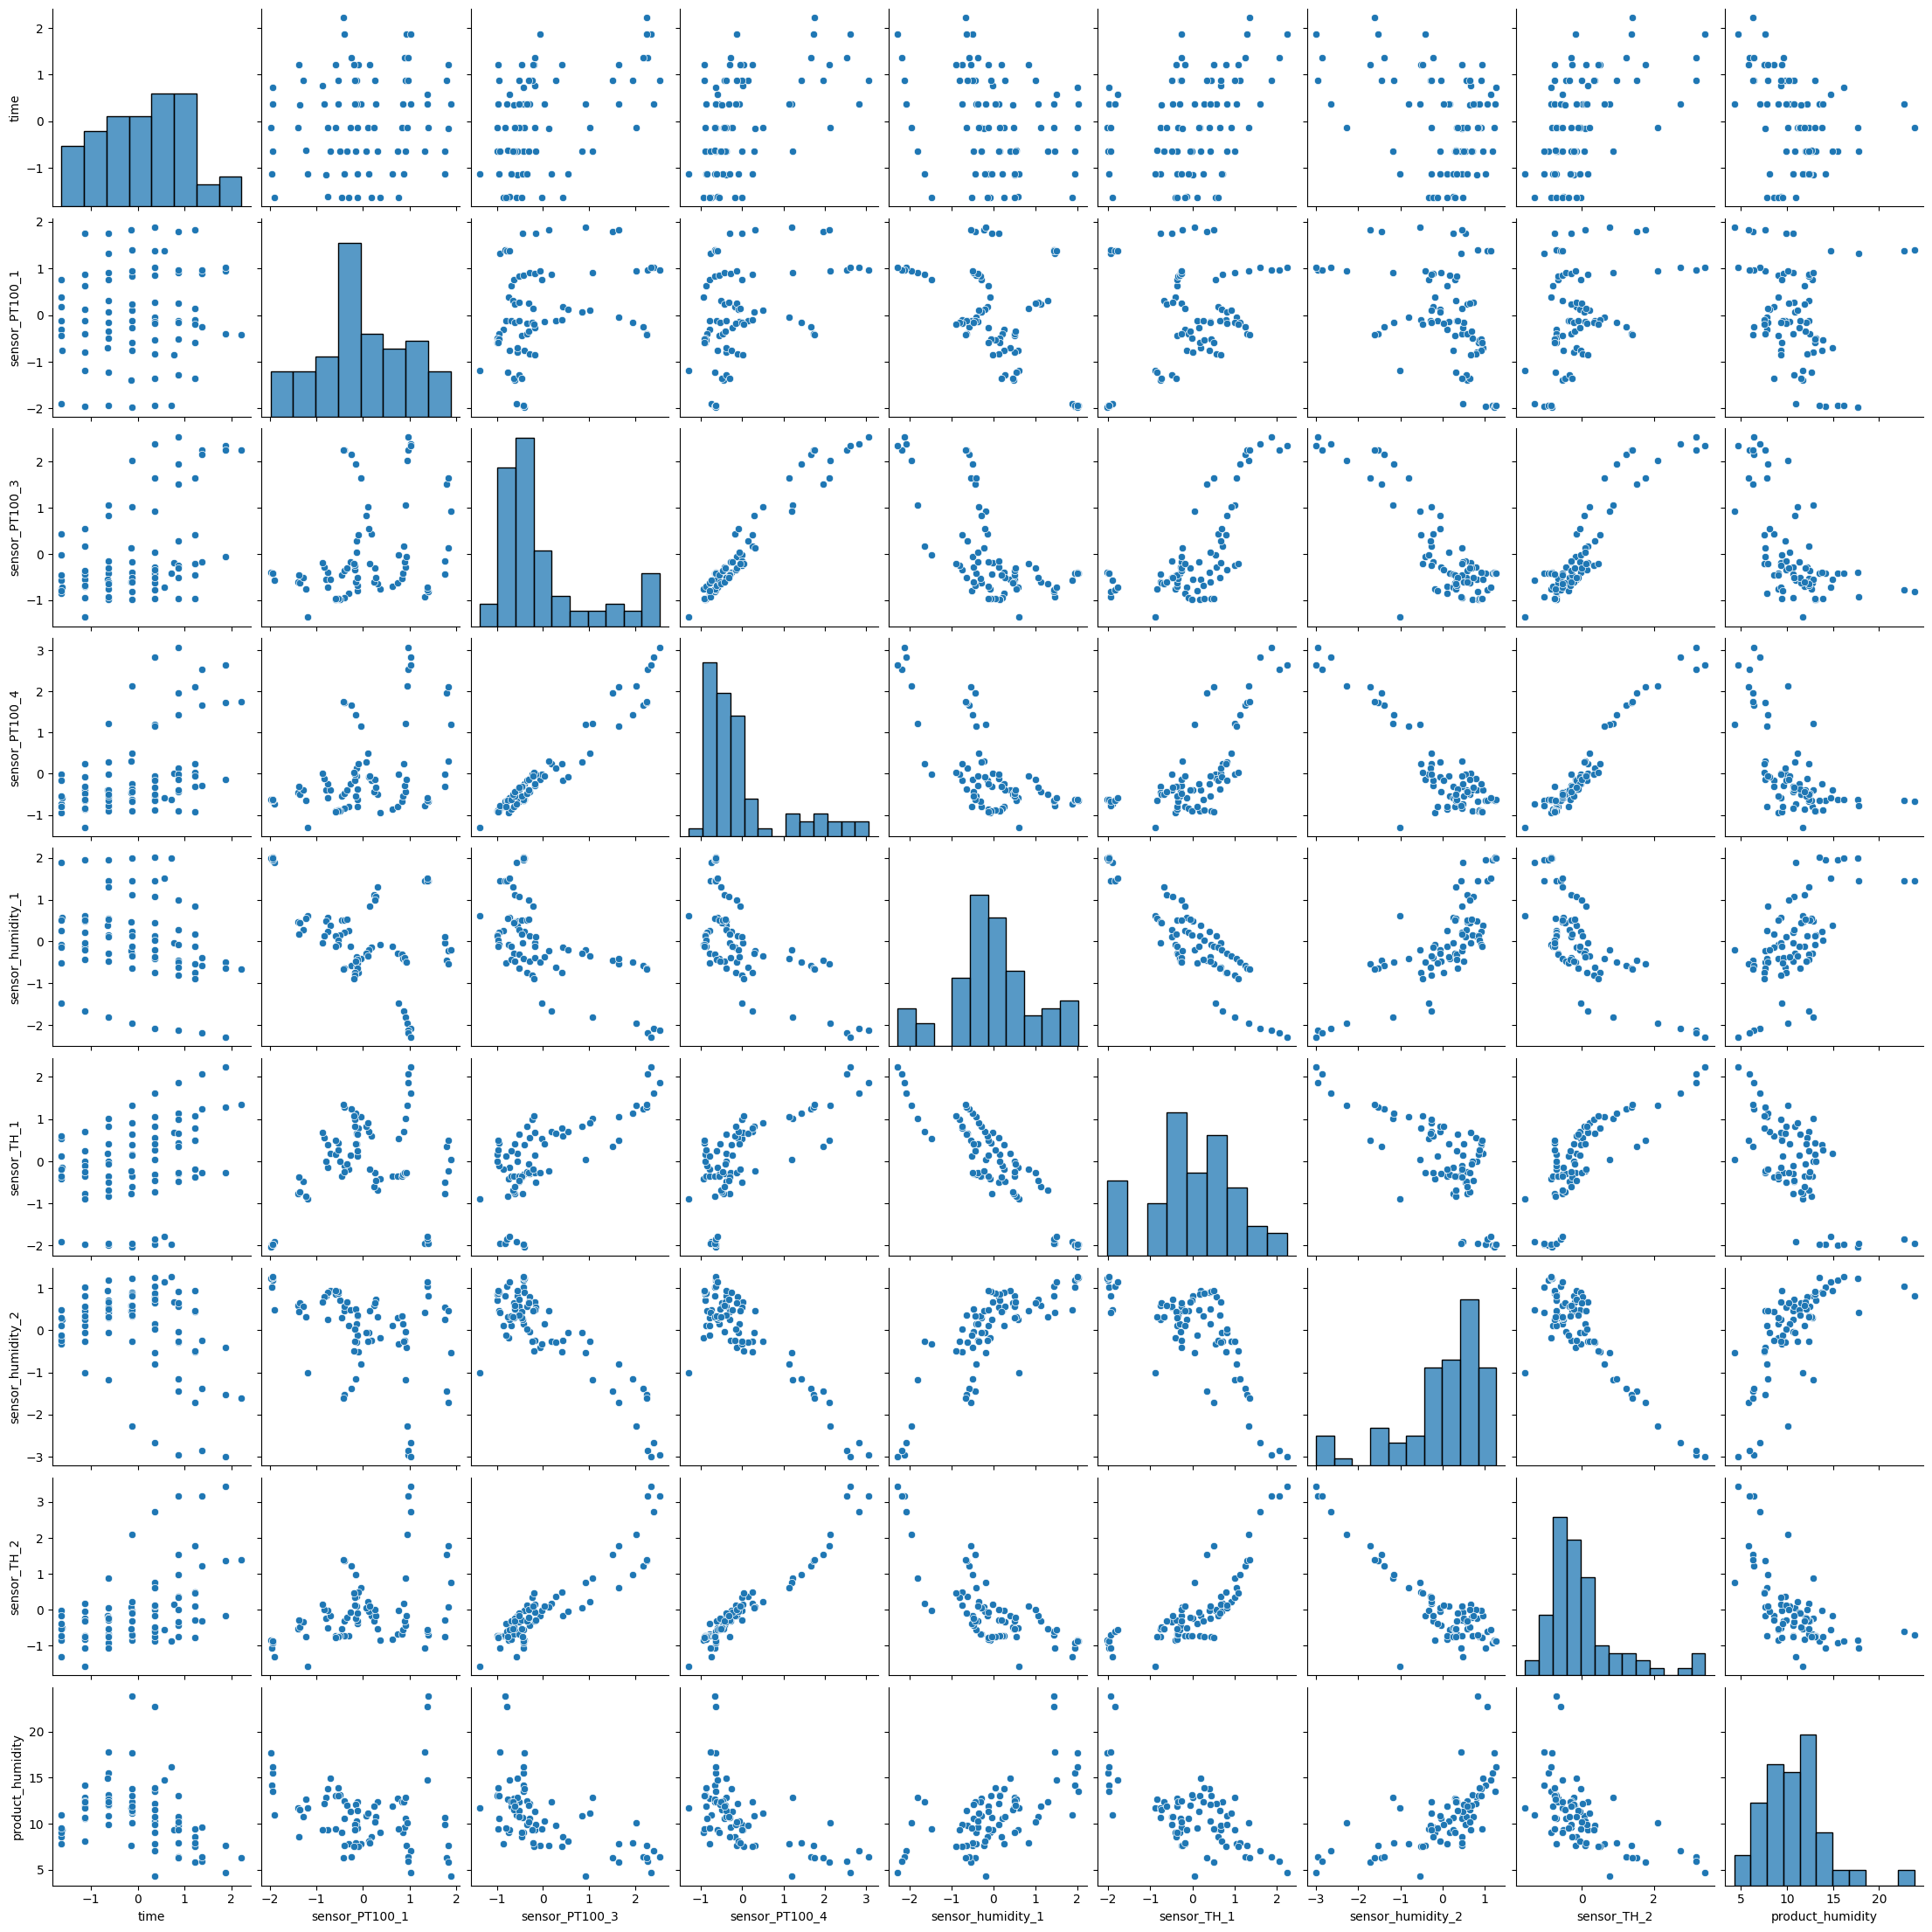

In [6]:
sns.pairplot(df_1_normalized)

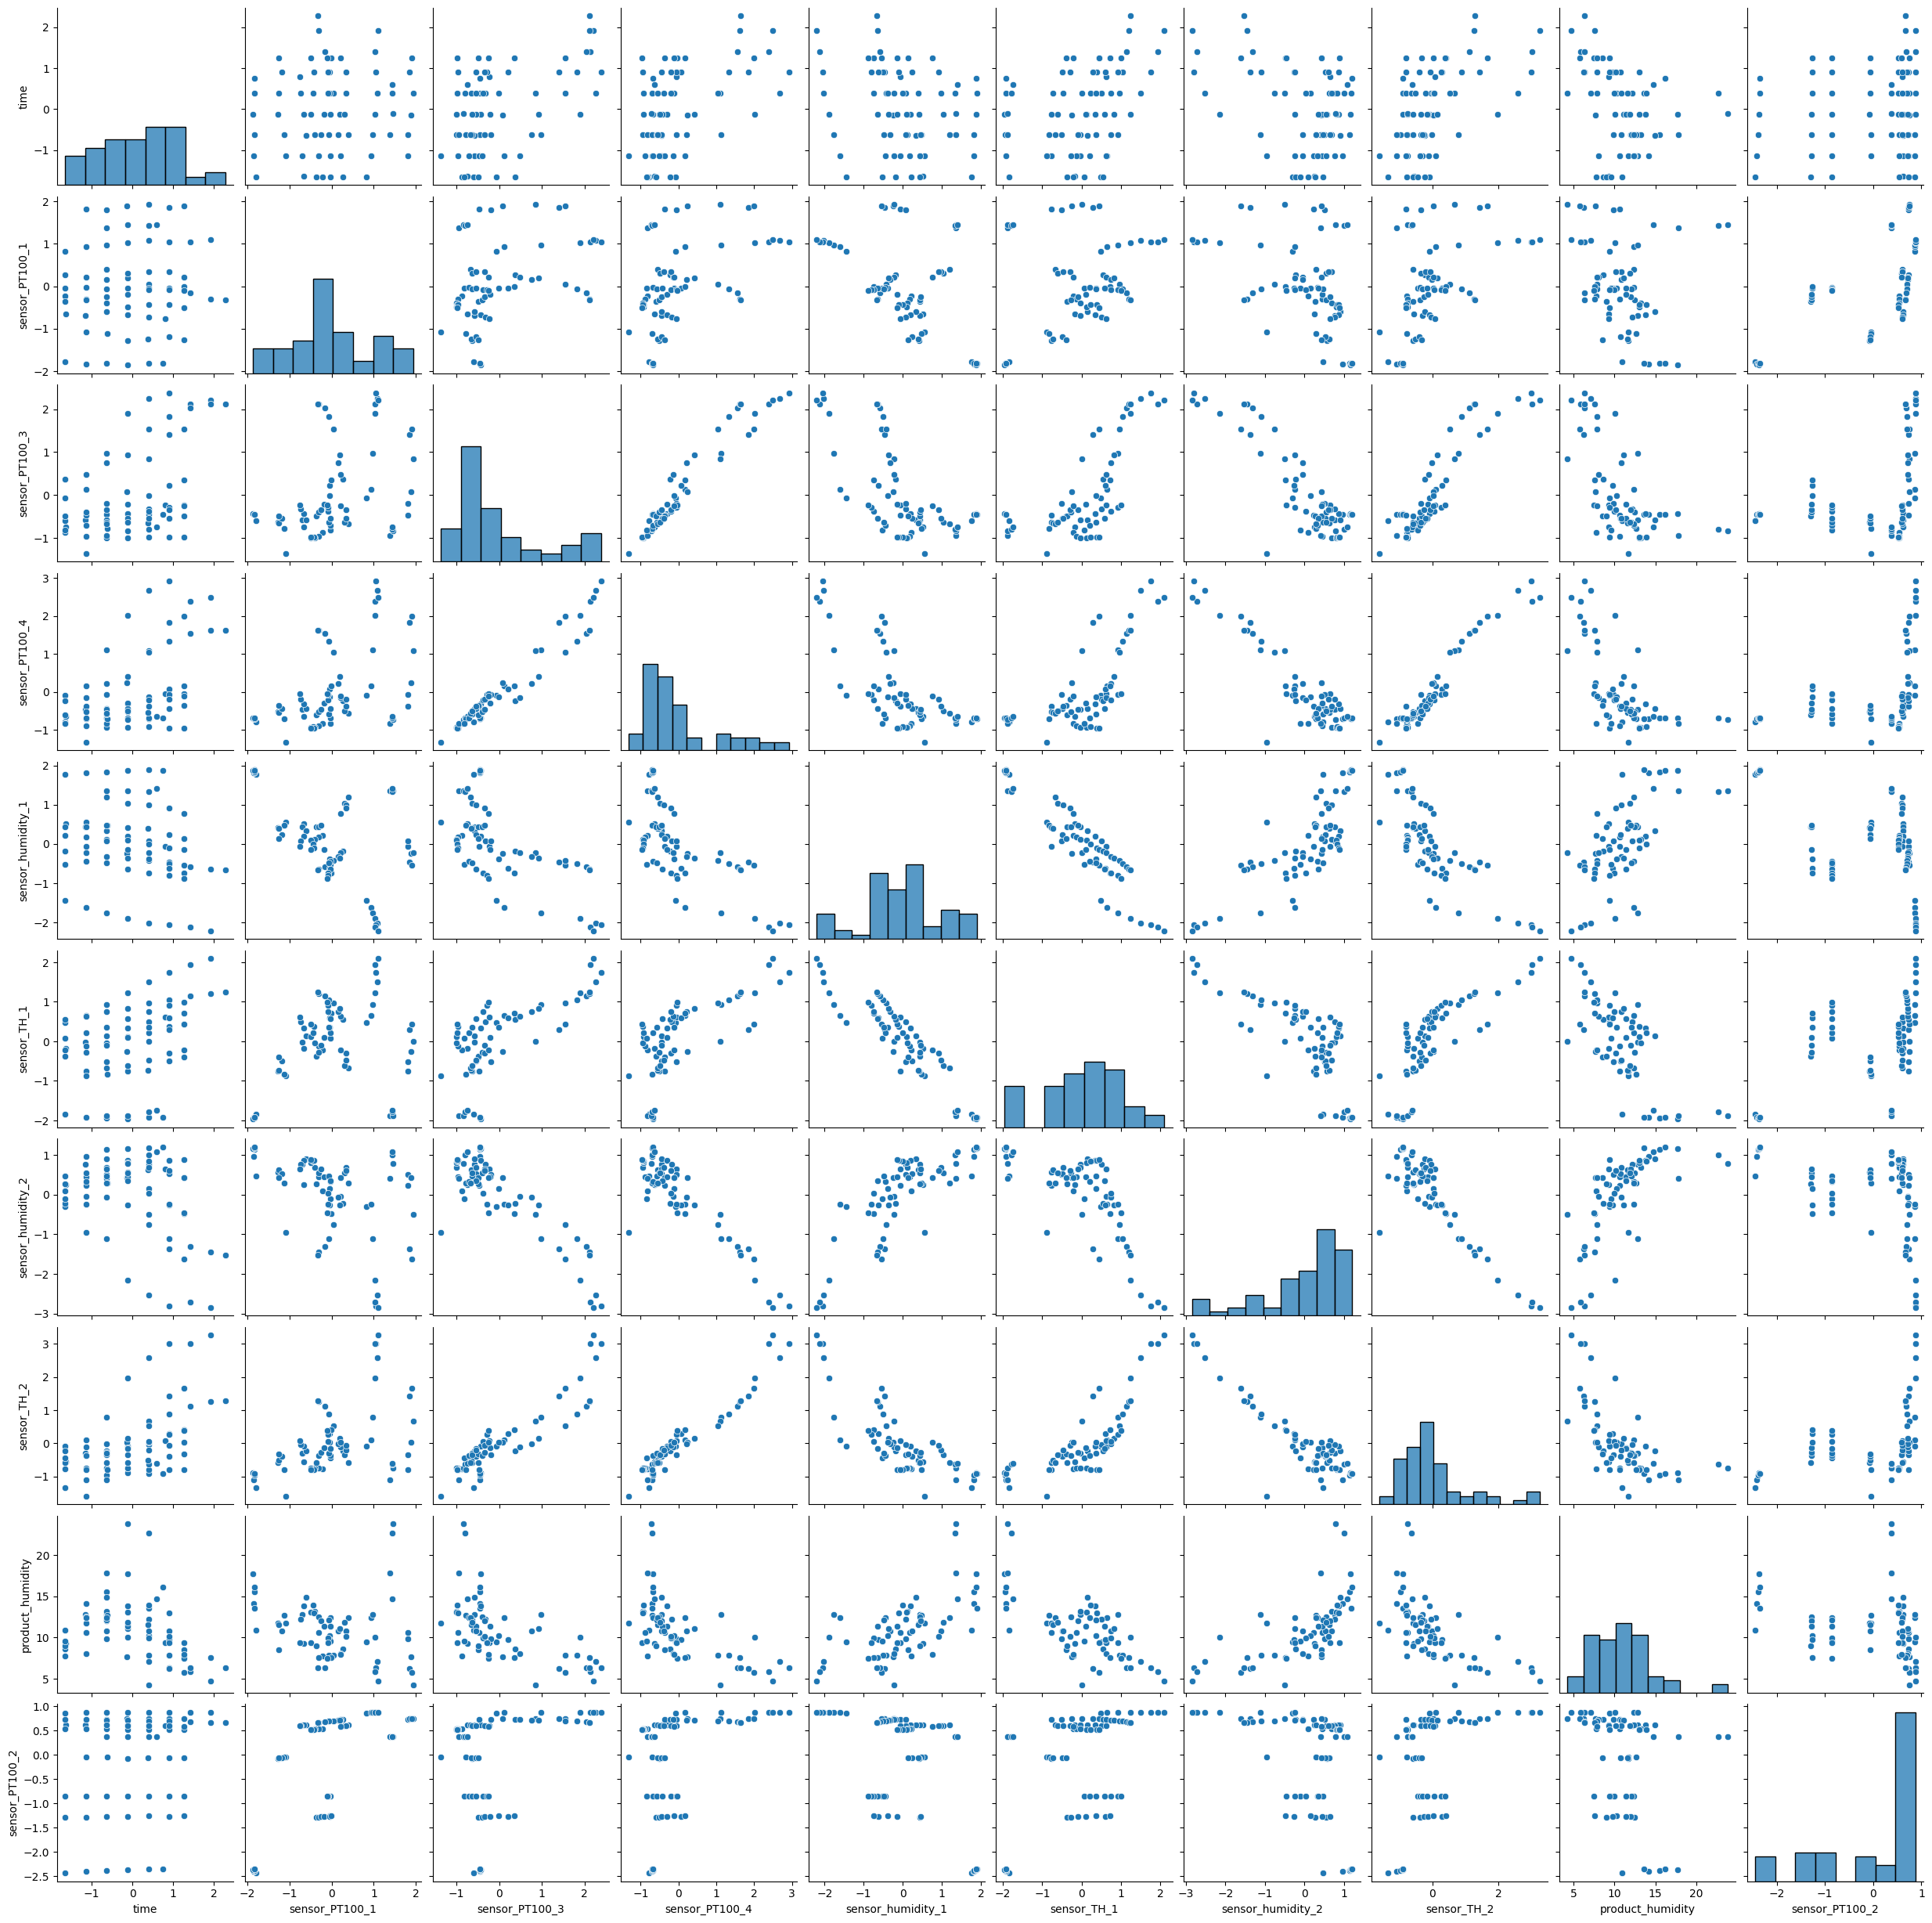

In [7]:
sns.pairplot(df_2_normalized)

# Linear regression with statsmodels 

#### Dataset 1 (without column)

In [8]:
exception_list = [y_name]

formula = y_name + ' ~ '
for i, col in enumerate(df_1_X):
    if (col in exception_list): continue
    if (i == 0): formula += col
    else: formula += f' + {col}'

print(f'Formula: {formula}\n')
lm = sm.ols(formula=formula, data=df_1_normalized)
lm = lm.fit()
print(lm.summary())

Formula: product_humidity ~ time + sensor_PT100_1 + sensor_PT100_3 + sensor_PT100_4 + sensor_humidity_1 + sensor_TH_1 + sensor_humidity_2 + sensor_TH_2

                            OLS Regression Results                            
Dep. Variable:       product_humidity   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     11.17
Date:                Wed, 24 May 2023   Prob (F-statistic):           4.99e-10
Time:                        14:53:25   Log-Likelihood:                -177.34
No. Observations:                  79   AIC:                             372.7
Df Residuals:                      70   BIC:                             394.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P

#### Dataset 2 (without lines from ensaio 1)

In [9]:
exception_list = [y_name]

formula = y_name + ' ~ '
for i, col in enumerate(df_2_X):
    if (col in exception_list): continue
    if (i == 0): formula += col
    else: formula += f' + {col}'

print(f'Formula: {formula}\n')
lm = sm.ols(formula=formula, data=df_2_normalized)
lm = lm.fit()
print(lm.summary())

Formula: product_humidity ~ time + sensor_PT100_1 + sensor_PT100_3 + sensor_PT100_4 + sensor_humidity_1 + sensor_TH_1 + sensor_humidity_2 + sensor_TH_2 + sensor_PT100_2

                            OLS Regression Results                            
Dep. Variable:       product_humidity   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     10.55
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.20e-09
Time:                        14:53:25   Log-Likelihood:                -158.06
No. Observations:                  71   AIC:                             336.1
Df Residuals:                      61   BIC:                             358.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err 

# SVM Regressor with scikit-learn

#### Dataset 1 (without column)

In [10]:
from sklearn.svm import SVR

# Create the Support Vector Regressor and fit the data
svm_model = SVR()
svm_model.fit(df_1_X, df_1_y)

score = svm_model.score(df_1_X, df_1_y)
print(f'This model is {score*100:.2f}% right')

This model is 58.13% right


#### Dataset 2 (without lines from ensaio 1)

In [11]:
from sklearn.svm import SVR

# Create the Support Vector Regressor and fit the data
svm_model = SVR()
svm_model.fit(df_2_X, df_2_y)


score = svm_model.score(df_2_X, df_2_y)
print(f'This model is {score*100:.2f}% right')

This model is 56.02% right


# Neural network scikit-learn

#### Dataset 1 (without column)

In [12]:
from sklearn.neural_network import MLPRegressor

tries = int(1e2)
max_score = 0
best_model = ''

for i in range(tries):
    if (i%25 == 0): print(f'Progress: {i/tries*100:.2f}%')
    # Create the MLPRegressor with multiple hidden layers and more hidden units
    mlp = MLPRegressor(
        hidden_layer_sizes=[50, 50, 50],
        activation='logistic',
        max_iter=int(1e4))

    # Train the neural network
    mlp.fit(df_1_X, df_1_y)

    # Make predictions on the test set
    y_pred = mlp.predict(df_1_X)

    score = mlp.score(df_1_X, df_1_y)
    if (max_score < score): 
        max_score = score
        best_model = mlp

print(f'Is {max_score*100:.2f}% right')

Progress: 0.00%
Progress: 25.00%
Progress: 50.00%
Progress: 75.00%
Is 99.60% right


Mean of Residuals: 0.007747190942477471


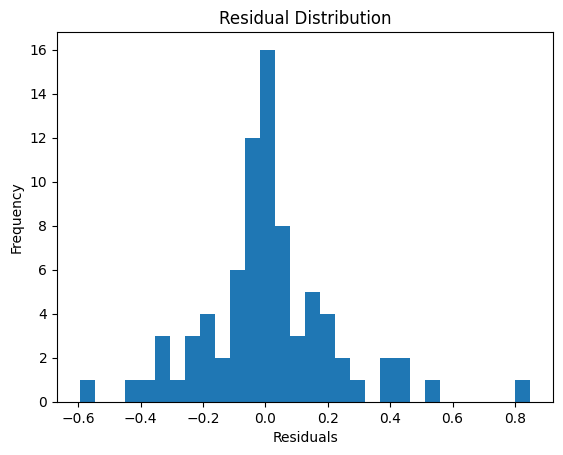

In [13]:
residuals = df_1_y - best_model.predict(df_1_X)
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)
# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

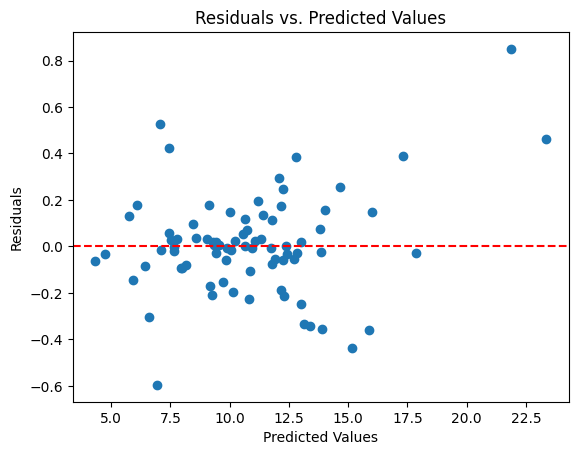

In [14]:
plt.scatter(best_model.predict(df_1_X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

#### Dataset 2 (without lines from ensaio 1)

In [15]:
from sklearn.neural_network import MLPRegressor

tries = int(1e2)
max_score = 0
best_model = ''

for i in range(tries):
    if (i%25 == 0): print(f'Progress: {i/tries*100:.2f}%')
    # Create the MLPRegressor with multiple hidden layers and more hidden units
    mlp = MLPRegressor(
        hidden_layer_sizes=[50, 50, 50],
        activation='logistic',
        max_iter=int(1e4))

    # Train the neural network
    mlp.fit(df_2_X, df_2_y)

    # Make predictions on the test set
    y_pred = mlp.predict(df_2_X)

    score = mlp.score(df_2_X, df_2_y)
    if (max_score < score): 
        max_score = score
        best_model = mlp

print(f'Is {max_score*100:.2f}% right')

Progress: 0.00%
Progress: 25.00%
Progress: 50.00%
Progress: 75.00%
Is 99.66% right


Mean of Residuals: 0.012657742091560639


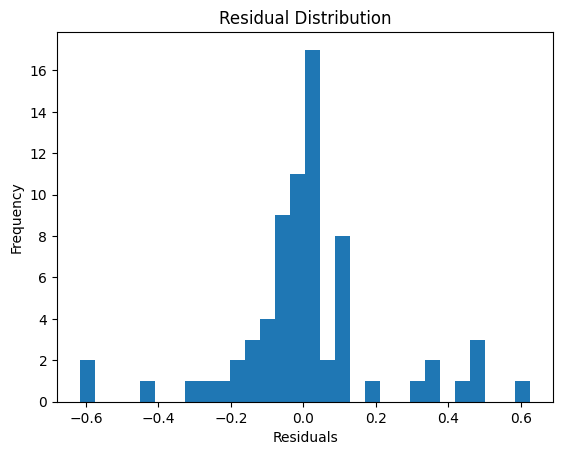

In [16]:
residuals = df_2_y - best_model.predict(df_2_X)
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)
# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

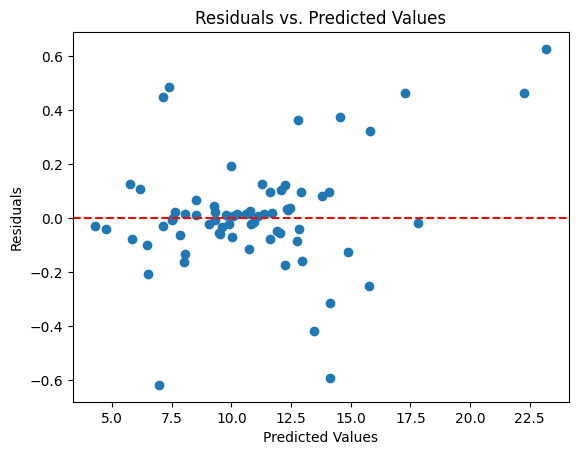

In [17]:
plt.scatter(best_model.predict(df_2_X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Neural network with Tensorflow

In [18]:
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1
